In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Analysis
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import (
    mean_squared_error, r2_score, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression

# Advanced Techniques
from xgboost import XGBClassifier
from scipy.stats import ttest_ind
import shap

In [ ]:
# Load dataset
df = pd.read_csv('/content/drive/My Drive/superstore_data.csv')

# Exploratory Data Analysis (EDA)


In [ ]:
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values Percentage:\n")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

# Fill missing values in 'Income' column with the mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Renaming columns for consistency and readability
df.rename(columns={
  'Id': 'Customer_ID',
    'Year_Birth': 'Birth_Year',
    'Education': 'Education_Level',
    'Marital_Status': 'Marital_Status',
    'Income': 'Annual_Income',
    'Kidhome': 'Children_At_Home',
    'Teenhome': 'Teens_At_Home',
    'Dt_Customer': 'Registration_Date',
    'Recency': 'Days_Since_Last_Purchase',
    'MntWines': 'Spent_On_Wines',
    'MntFruits': 'Spent_On_Fruits',
    'MntMeatProducts': 'Spent_On_Meat',
    'MntFishProducts': 'Spent_On_Fish',
    'MntSweetProducts': 'Spent_On_Sweets',
    'MntGoldProds': 'Spent_On_Gold',
    'NumDealsPurchases': 'Deals_Purchases',
    'NumWebPurchases': 'Web_Purchases',
    'NumCatalogPurchases': 'Catalog_Purchases',
    'NumStorePurchases': 'Store_Purchases',
    'NumWebVisitsMonth': 'Web_Visits_Month',
    'Response': 'Campaign_Response'
}, inplace=True)

# Add derived columns: Age and Enrollment Days
df['Age'] = 2024 - df['Birth_Year']
df['Enrollment_Days'] = (pd.to_datetime('2024-01-01') - pd.to_datetime(df['Registration_Date'])).dt.days

# Drop irrelevant columns
df.drop(['Customer_ID', 'Birth_Year', 'Registration_Date'], axis=1, inplace=True)

# Visualize missing values after processing
print("\nUpdated Missing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases

# Visualizations for EDA

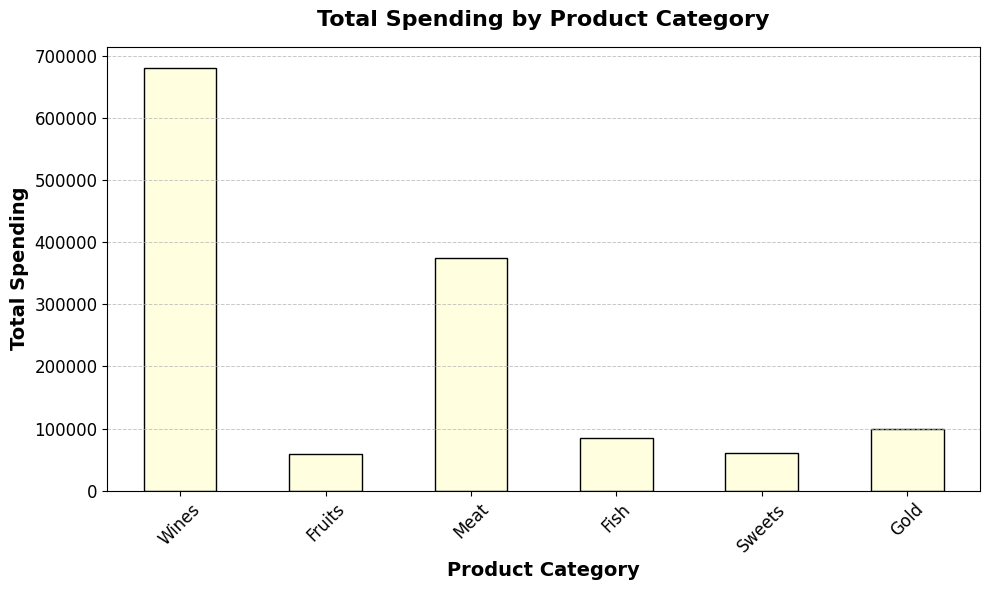

In [ ]:
# Aggregate spending for each category
category_spending = df[['Spent_On_Wines', 'Spent_On_Fruits', 'Spent_On_Meat',
                        'Spent_On_Fish', 'Spent_On_Sweets', 'Spent_On_Gold']].sum()


# Rename categories for better readability
category_spending_renamed = category_spending.rename(index={
    'Spent_On_Wines': 'Wines',
    'Spent_On_Fruits': 'Fruits',
    'Spent_On_Meat': 'Meat',
    'Spent_On_Fish': 'Fish',
    'Spent_On_Sweets': 'Sweets',
    'Spent_On_Gold': 'Gold'
})

# Improved Bar Chart
plt.figure(figsize=(10, 6))
category_spending_renamed.plot(kind='bar', color='lightyellow', edgecolor='black')
plt.title('Total Spending by Product Category', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('Total Spending', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Add gridlines for clarity
plt.tight_layout()
plt.show()


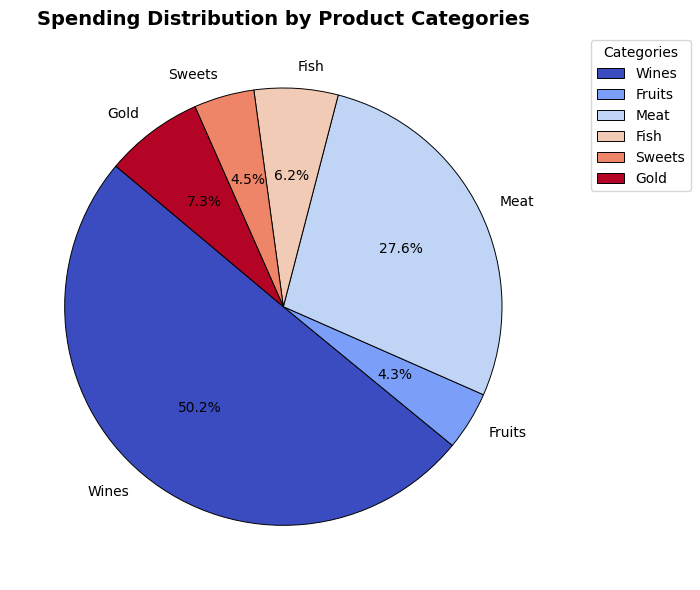

In [ ]:
# Improved Pie Chart with Renamed Legend
plt.figure(figsize=(8, 6))
renamed_category_spending = category_spending.rename(index={
    'Spent_On_Wines': 'Wines',
    'Spent_On_Fruits': 'Fruits',
    'Spent_On_Meat': 'Meat',
    'Spent_On_Fish': 'Fish',
    'Spent_On_Sweets': 'Sweets',
    'Spent_On_Gold': 'Gold'
})

renamed_category_spending.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.coolwarm(np.linspace(0, 1, len(renamed_category_spending))),
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.7}
)
plt.title('Spending Distribution by Product Categories', fontsize=14, fontweight='bold')
plt.ylabel('')  # Remove the y-axis label for better appearance
plt.legend(renamed_category_spending.index, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-7-0a87c573e94f>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-7-0a87c573e94f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


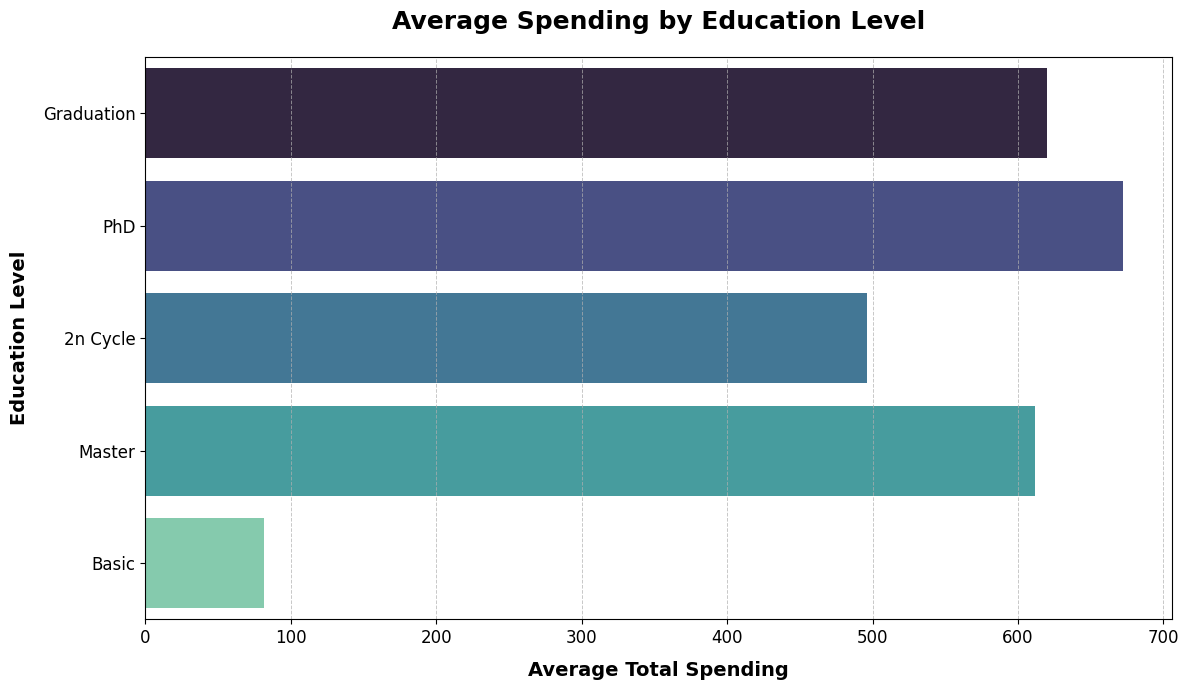

In [ ]:
# Ensure Total_Spending is calculated
if 'Total_Spending' not in df.columns:
    df['Total_Spending'] = (df['Spent_On_Wines'] + df['Spent_On_Fruits'] +
                            df['Spent_On_Meat'] + df['Spent_On_Fish'] +
                            df['Spent_On_Sweets'] + df['Spent_On_Gold'])


# Improved Horizontal Bar Chart for Average Spending by Education Level
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df,
    y='Education_Level',
    x='Total_Spending',
    ci=None,
    palette='mako'  # Visually appealing color scheme
)
plt.title('Average Spending by Education Level', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Average Total Spending', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Education Level', fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', linewidth=0.7, alpha=0.7)  # Add subtle gridlines
plt.tight_layout()
plt.show()


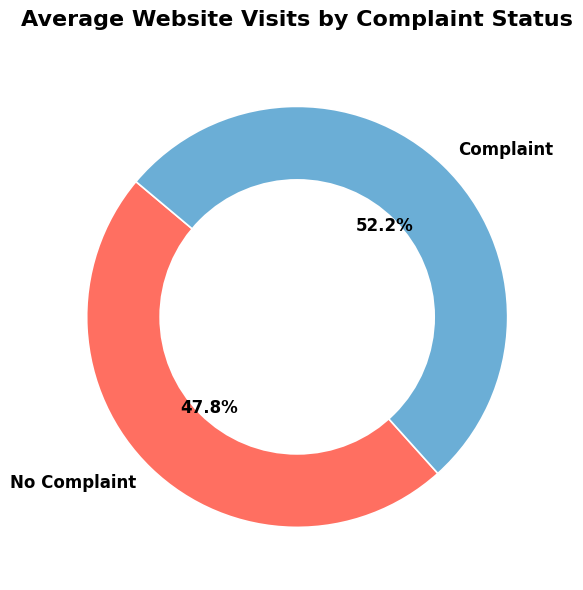

In [ ]:
# Calculate average website visits by complaint status
avg_visits_by_complaint = df.groupby('Complain')['Web_Visits_Month'].mean()

# Create an improved donut chart
plt.figure(figsize=(8, 6))
colors = ['#FF6F61', '#6BAED6']  # More visually appealing color palette
plt.pie(
    avg_visits_by_complaint,
    labels=['No Complaint', 'Complaint'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'linewidth': 1.2, 'edgecolor': 'white'},
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Add a circle in the middle to create the donut effect
centre_circle = plt.Circle((0, 0), 0.65, fc='white', edgecolor='white', linewidth=1.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title with styling
plt.title('Average Website Visits by Complaint Status', fontsize=16, fontweight='bold', pad=20)

# Adjust layout for a cleaner look
plt.tight_layout()
plt.show()


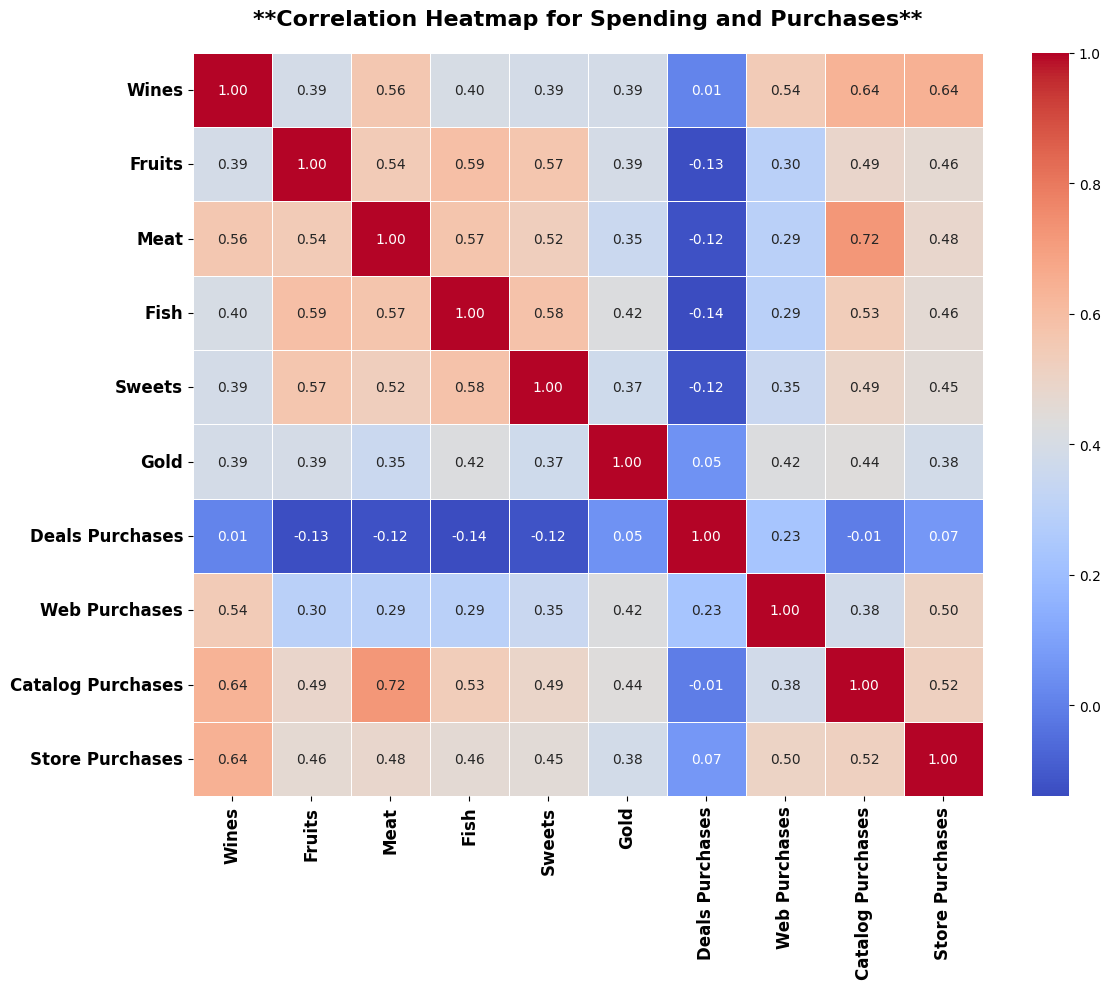

In [ ]:
# Rename columns for better readability
correlation_data = df.rename(columns={
    'Spent_On_Wines': 'Wines',
    'Spent_On_Fruits': 'Fruits',
    'Spent_On_Meat': 'Meat',
    'Spent_On_Fish': 'Fish',
    'Spent_On_Sweets': 'Sweets',
    'Spent_On_Gold': 'Gold',
    'Deals_Purchases': 'Deals Purchases',
    'Web_Purchases': 'Web Purchases',
    'Catalog_Purchases': 'Catalog Purchases',
    'Store_Purchases': 'Store Purchases'
})[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
    'Deals Purchases', 'Web Purchases', 'Catalog Purchases', 'Store Purchases']]

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('**Correlation Heatmap for Spending and Purchases**', fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold', rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-10-fa41833f9330>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  response_by_age_group = df.groupby('Age_Group')['Campaign_Response'].mean()


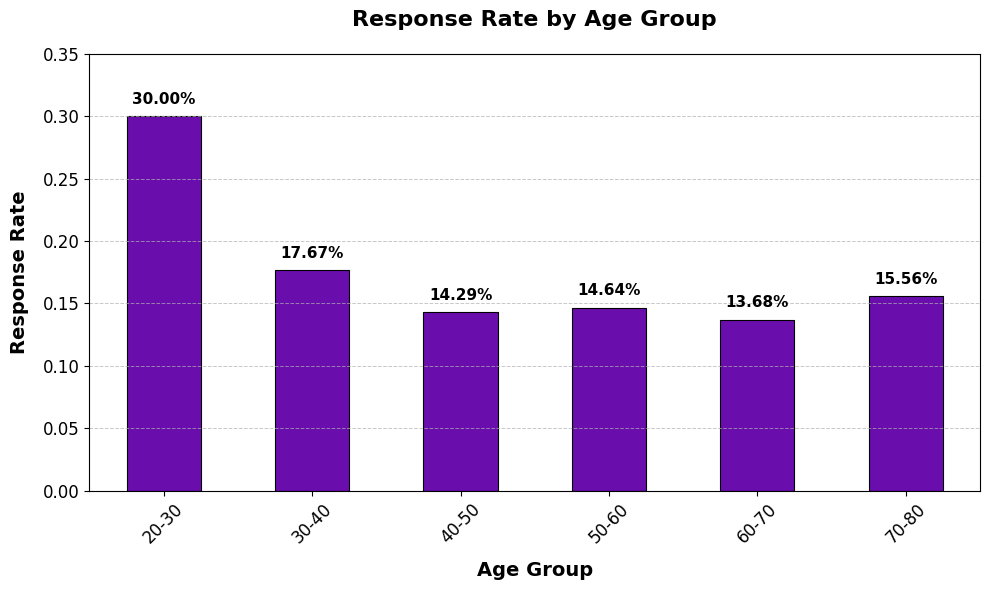

In [ ]:
# Create Age Groups
df['Age_Group'] = pd.cut(
    df['Age'], bins=[20, 30, 40, 50, 60, 70, 80],
    labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
)

# Calculate Response Rate by Age Group
response_by_age_group = df.groupby('Age_Group')['Campaign_Response'].mean()

# Improved Bar Chart
plt.figure(figsize=(10, 6))
response_by_age_group.plot(kind='bar', color='#6A0DAD', edgecolor='black', linewidth=0.8)  # Purple with black edges

plt.title('Response Rate by Age Group', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Age Group', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Response Rate', fontsize=14, fontweight='bold', labelpad=10)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, response_by_age_group.max() + 0.05)  # Add some space above bars
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Add horizontal gridlines

# Add percentage labels on top of bars
for index, value in enumerate(response_by_age_group):
    plt.text(index, value + 0.01, f'{value:.2%}', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


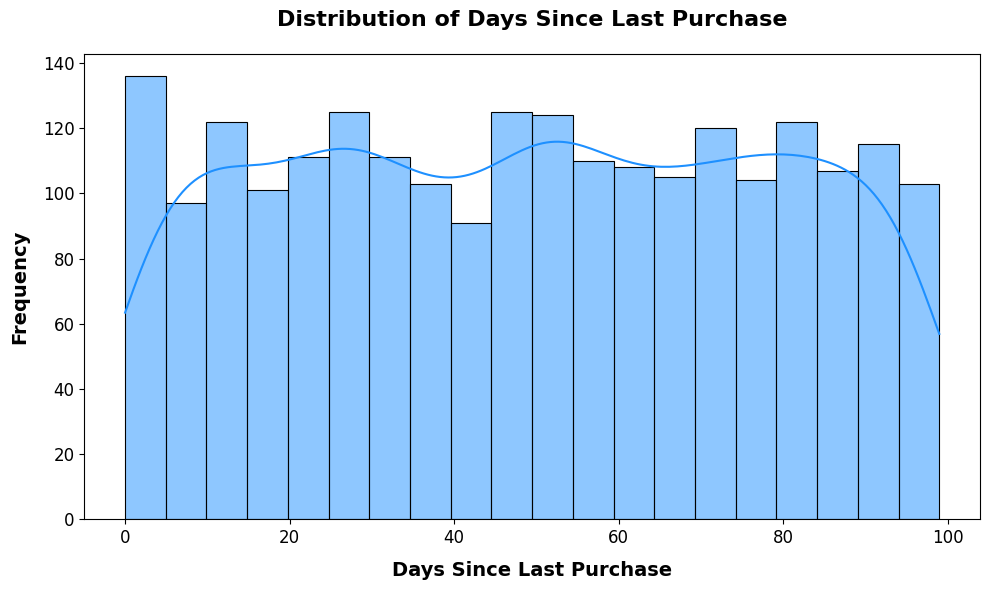

In [ ]:
# Improved Histogram for Days Since Last Purchase (No Gridlines)
plt.figure(figsize=(10, 6))
sns.histplot(
    df['Days_Since_Last_Purchase'],
    kde=True,
    bins=20,
    color='dodgerblue',
    edgecolor='black',
    linewidth=0.8
)

# Enhance title and axis labels
plt.title('Distribution of Days Since Last Purchase', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Days Since Last Purchase', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Frequency', fontsize=14, fontweight='bold', labelpad=10)

# Improve ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


<ipython-input-12-a45224c715f1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-12-a45224c715f1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


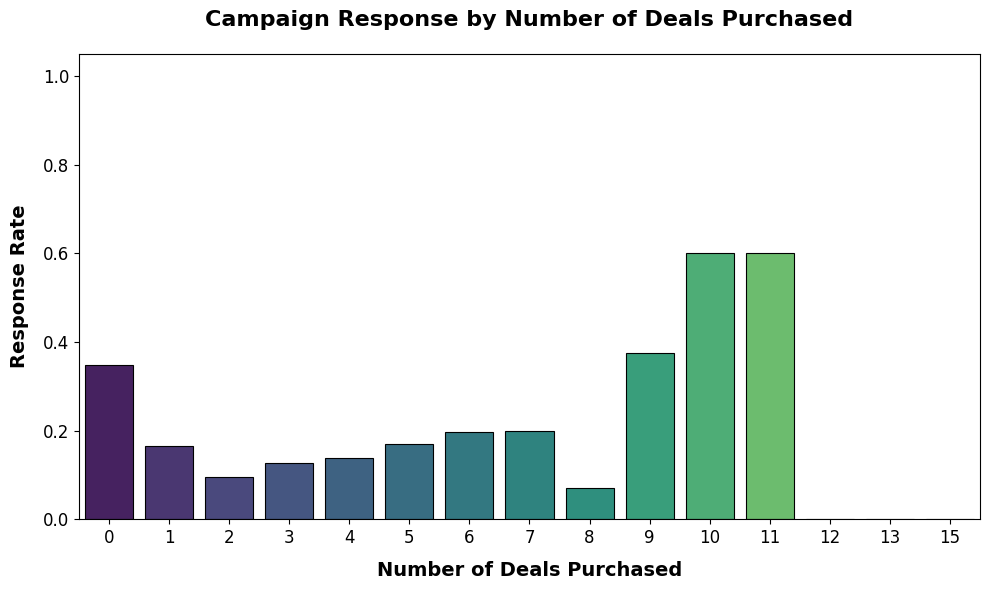

In [ ]:
# Improved Bar Plot for Response by Number of Deals Purchased
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Deals_Purchases',
    y='Campaign_Response',
    ci=None,
    palette='viridis',  # A more visually appealing color palette
    edgecolor='black',  # Add edges to the bars
    linewidth=0.8       # Define the edge thickness
)

# Enhance title and axis labels
plt.title('Campaign Response by Number of Deals Purchased', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Deals Purchased', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Response Rate', fontsize=14, fontweight='bold', labelpad=10)

# Improve ticks and layout
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, df['Campaign_Response'].max() + 0.05)  # Add some margin above the highest bar

# Adjust layout for better aesthetics
plt.tight_layout()
plt.show()


#Pre-processing


# Model 1: Campaign Response Prediction

In [ ]:
# ---------------------------
df = pd.read_csv('/content/drive/My Drive/superstore_data.csv')
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values Percentage:\n")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

# Fill missing values in 'Income' column with the mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Renaming columns for consistency and readability
df.rename(columns={
    'Id': 'Customer_ID',
    'Year_Birth': 'Birth_Year',
    'Education': 'Education_Level',
    'Marital_Status': 'Marital_Status',
    'Income': 'Annual_Income',
    'Kidhome': 'Children_At_Home',
    'Teenhome': 'Teens_At_Home',
    'Dt_Customer': 'Registration_Date',
    'Recency': 'Days_Since_Last_Purchase',
    'MntWines': 'Spent_On_Wines',
    'MntFruits': 'Spent_On_Fruits',
    'MntMeatProducts': 'Spent_On_Meat',
    'MntFishProducts': 'Spent_On_Fish',
    'MntSweetProducts': 'Spent_On_Sweets',
    'MntGoldProds': 'Spent_On_Gold',
    'NumDealsPurchases': 'Deals_Purchases',
    'NumWebPurchases': 'Web_Purchases',
    'NumCatalogPurchases': 'Catalog_Purchases',
    'NumStorePurchases': 'Store_Purchases',
    'NumWebVisitsMonth': 'Web_Visits_Month',
    'Response': 'Campaign_Response'
}, inplace=True)



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases

Accuracy: 0.8816964285714286
Precision: 0.625
Recall: 0.5223880597014925
F1 Score: 0.5691056910569106
ROC-AUC: 0.9117600971520351


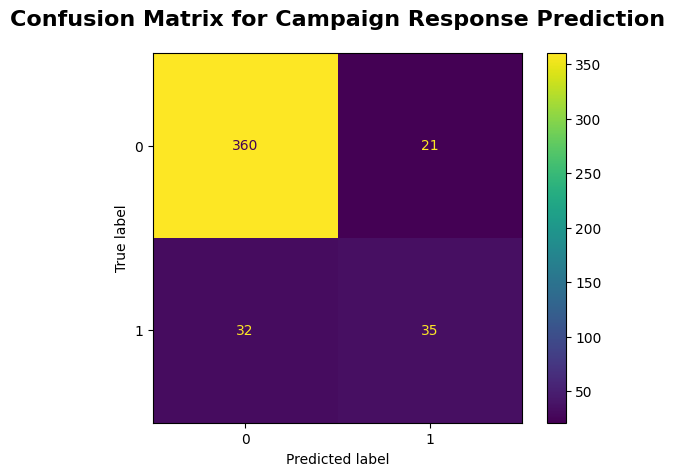

In [ ]:
# Add derived columns: Age and Enrollment Days
df['Age'] = 2024 - df['Birth_Year']
df['Enrollment_Days'] = (pd.to_datetime('2024-01-01') - pd.to_datetime(df['Registration_Date'])).dt.days

# Drop irrelevant columns
df.drop(['Customer_ID', 'Birth_Year', 'Registration_Date'], axis=1, inplace=True)


# Encode categorical variables
categorical_cols = ['Education_Level', 'Marital_Status']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = [
    'Annual_Income', 'Spent_On_Fish', 'Spent_On_Meat', 'Spent_On_Fruits',
    'Spent_On_Sweets', 'Spent_On_Wines', 'Spent_On_Gold', 'Deals_Purchases',
    'Catalog_Purchases', 'Store_Purchases', 'Web_Purchases', 'Web_Visits_Month',
    'Days_Since_Last_Purchase', 'Age', 'Enrollment_Days'
]
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Splitting dataset
X = df.drop('Campaign_Response', axis=1)  # Updated: Response → Campaign_Response
y = df['Campaign_Response']  # Updated: Response → Campaign_Response
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Predictions and evaluation
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix with Bold Title
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix for Campaign Response Prediction', fontsize=16, fontweight='bold', pad=20)
plt.show()

#Churn Prediction Model

In [ ]:
# ---------------------------
df = pd.read_csv('/content/drive/My Drive/superstore_data.csv')
# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values Percentage:\n")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

# Fill missing values in 'Income' column with the mean
df['Income'] = df['Income'].fillna(df['Income'].mean())

# Renaming columns for consistency and readability
df.rename(columns={
    'Id': 'Customer_ID',
    'Year_Birth': 'Birth_Year',
    'Education': 'Education_Level',
    'Marital_Status': 'Marital_Status',
    'Income': 'Annual_Income',
    'Kidhome': 'Children_At_Home',
    'Teenhome': 'Teens_At_Home',
    'Dt_Customer': 'Registration_Date',
    'Recency': 'Days_Since_Last_Purchase',
    'MntWines': 'Spent_On_Wines',
    'MntFruits': 'Spent_On_Fruits',
    'MntMeatProducts': 'Spent_On_Meat',
    'MntFishProducts': 'Spent_On_Fish',
    'MntSweetProducts': 'Spent_On_Sweets',
    'MntGoldProds': 'Spent_On_Gold',
    'NumDealsPurchases': 'Deals_Purchases',
    'NumWebPurchases': 'Web_Purchases',
    'NumCatalogPurchases': 'Catalog_Purchases',
    'NumStorePurchases': 'Store_Purchases',
    'NumWebVisitsMonth': 'Web_Visits_Month',
    'Response': 'Campaign_Response'
}, inplace=True)



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases

In [ ]:
# Define churn: customers inactive for >90 days
df['Churn'] = (df['Days_Since_Last_Purchase'] > 90).astype(int)

# Calculate 'Total_Spending' if not already done
df['Total_Spending'] = (
    df['Spent_On_Wines'] + df['Spent_On_Fruits'] + df['Spent_On_Meat'] +
    df['Spent_On_Fish'] + df['Spent_On_Sweets'] + df['Spent_On_Gold']
)

# Features for churn prediction
features_churn = [
    'Annual_Income', 'Children_At_Home', 'Teens_At_Home', 'Deals_Purchases',
    'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases',
    'Web_Visits_Month', 'Days_Since_Last_Purchase', 'Total_Spending'
]

X_churn = df[features_churn]  # Ensure all columns exist
y_churn = df['Churn']

# Split the dataset
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(
    X_churn, y_churn, test_size=0.2, random_state=42, stratify=y_churn
)

# Train Random Forest Classifier for churn prediction
churn_model = RandomForestClassifier(random_state=42)
churn_model.fit(X_train_churn, y_train_churn)

# Model evaluation metrics for churn prediction
y_pred_churn = churn_model.predict(X_test_churn)
y_prob_churn = churn_model.predict_proba(X_test_churn)[:, 1]

print("\nChurn Prediction Model Performance:")
print("Accuracy:", accuracy_score(y_test_churn, y_pred_churn))
print("Precision:", precision_score(y_test_churn, y_pred_churn))
print("Recall:", recall_score(y_test_churn, y_pred_churn))
print("F1 Score:", f1_score(y_test_churn, y_pred_churn))
print("ROC-AUC:", roc_auc_score(y_test_churn, y_prob_churn))



Churn Prediction Model Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 0.9999999999999999


#T-Test Analysis: Churn vs Retention

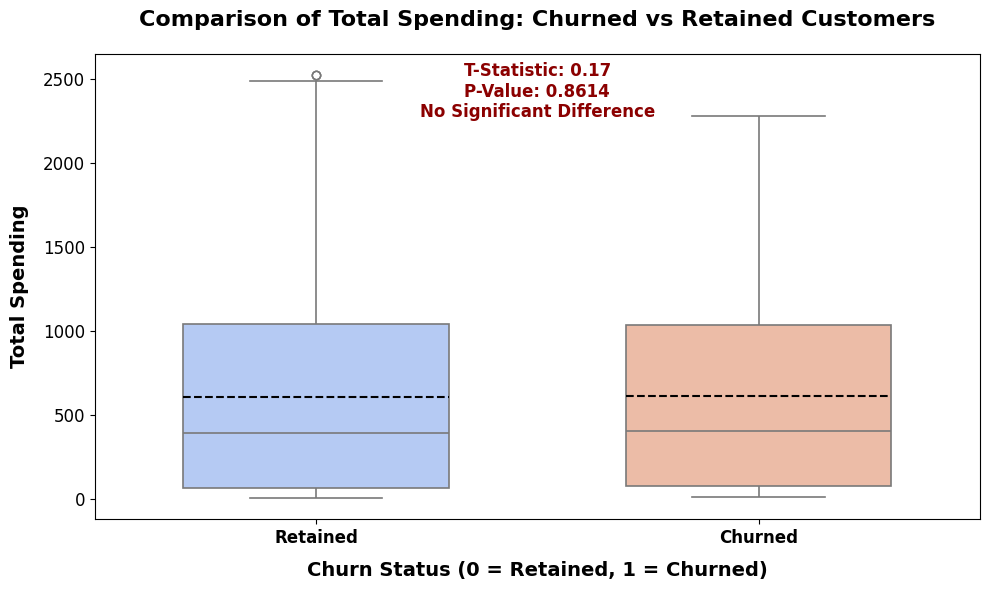

In [ ]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Perform T-Test
churned = df[df['Churn'] == 1]['Total_Spending']
retained = df[df['Churn'] == 0]['Total_Spending']

t_stat, p_value = ttest_ind(churned, retained, equal_var=False)  # Welch's T-Test

# Improved Visualization: Boxplot with Enhanced Styling
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Churn',
    y='Total_Spending',
    hue='Churn',  # Assign hue to resolve deprecation warning
    data=df,
    palette='coolwarm',
    width=0.6,
    linewidth=1.2,
    showmeans=True,
    meanline=True,
    meanprops={'color': 'black', 'linestyle': '--', 'linewidth': 1.5},
    dodge=False,
    legend=False
)

# Add title and axis labels with better styling
plt.title('Comparison of Total Spending: Churned vs Retained Customers', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Churn Status (0 = Retained, 1 = Churned)', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Total Spending', fontsize=14, fontweight='bold', labelpad=10)

# Improve ticks for readability
plt.xticks([0, 1], labels=['Retained', 'Churned'], fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Add annotations for T-test results
t_stat_text = f"T-Statistic: {t_stat:.2f}"
p_value_text = f"P-Value: {p_value:.4f}"
annotation_text = (
    f"{t_stat_text}\n{p_value_text}\n"
    f"{'Significant Difference' if p_value < 0.05 else 'No Significant Difference'}"
)
plt.text(
    0.5,
    max(df['Total_Spending']) * 0.9,
    annotation_text,
    fontsize=12,
    fontweight='bold',
    color='darkred',
    ha='center'
)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#Customer Segmentation

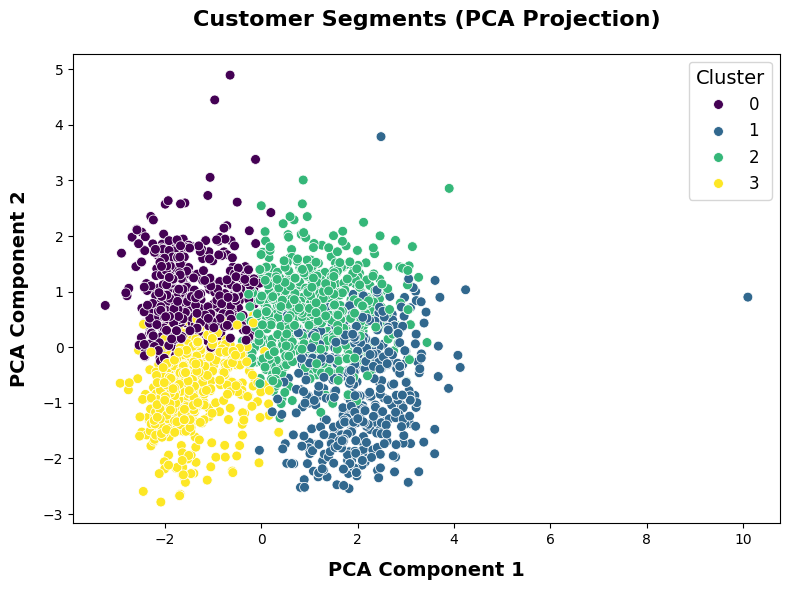

Cluster Summary:
         Annual_Income  Total_Spending  Children        Age  Web_Purchases  \
Cluster                                                                      
0         42292.377706      141.937768  1.924893  60.759657       2.384120   
1         79025.161168     1430.030992  0.072314  54.623967       4.572314   
2         60834.497276      826.201563  1.045313  59.562500       6.890625   
3         30989.751938      107.601538  0.812308  47.327692       2.178462   

         Store_Purchases  Total_Spending  
Cluster                                   
0               3.568670      141.937768  
1               8.241736     1430.030992  
2               8.175000      826.201563  
3               3.209231      107.601538  

**Recommendations for Marketing Strategies:**
1. Target Cluster 0 (likely high spenders) with premium offers and loyalty programs.
2. Focus on improving engagement with Cluster 2 (low spenders).
3. Use personalized campaigns for Cluster 3 based on family-

In [ ]:
# Feature Engineering
df['Total_Spending'] = (df['Spent_On_Fish'] + df['Spent_On_Meat'] +
                        df['Spent_On_Fruits'] + df['Spent_On_Sweets'] +
                        df['Spent_On_Wines'] + df['Spent_On_Gold'])
df['Children'] = df['Children_At_Home'] + df['Teens_At_Home']
df['Age'] = 2024 - df['Birth_Year']

# Select relevant features for clustering
clustering_features = [
    'Annual_Income', 'Total_Spending', 'Children', 'Age',
    'Web_Purchases', 'Store_Purchases'
]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[clustering_features])

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize Clusters Using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

# Visualize Clusters Using PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=50)
plt.title('Customer Segments (PCA Projection)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('PCA Component 1', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('PCA Component 2', fontsize=14, fontweight='bold', labelpad=10)
plt.legend(title='Cluster', fontsize=12, title_fontsize=14)
plt.tight_layout()
plt.show()

# Analyze Clusters
cluster_summary = df.groupby('Cluster')[clustering_features + ['Total_Spending']].mean()
print("Cluster Summary:")
print(cluster_summary)

# Recommendations for Marketing Strategies
print("\n**Recommendations for Marketing Strategies:**")
print("1. Target Cluster 0 (likely high spenders) with premium offers and loyalty programs.")
print("2. Focus on improving engagement with Cluster 2 (low spenders).")
print("3. Use personalized campaigns for Cluster 3 based on family-oriented products.")

#Customer Lifetime Value (CLV) Prediction


CLV Prediction Model Performance:
Mean Squared Error (MSE): 171458.70856974172
R-Squared (R2): 0.5165577910669992


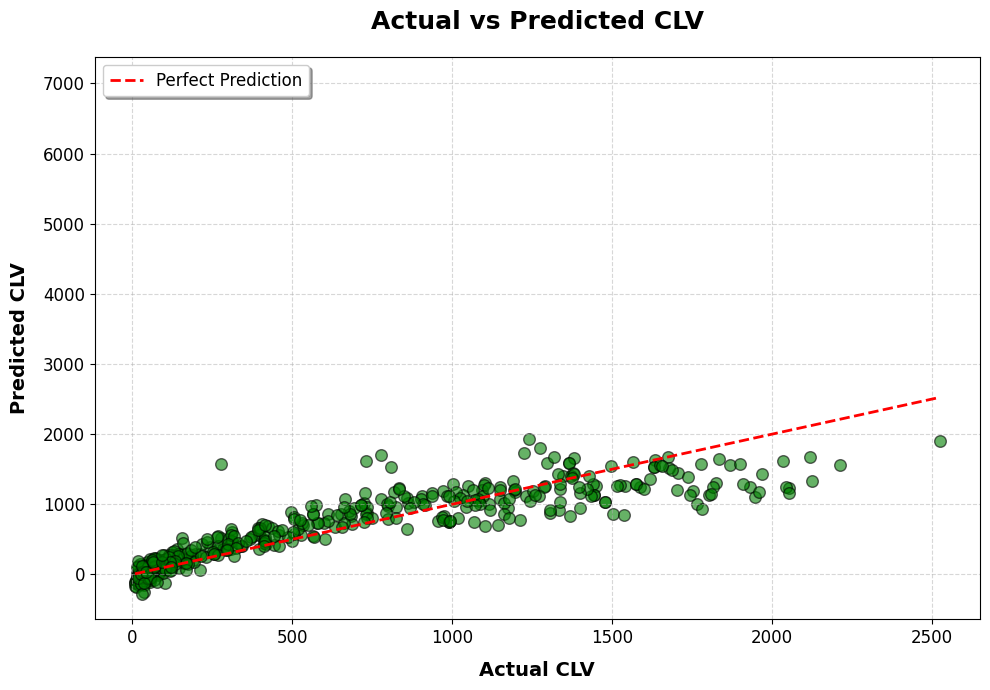

<ipython-input-19-b2184d45aad3>:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clv_segments = df.groupby('CLV_Segment')['Total_Spending'].mean()  # Mean spending per segment


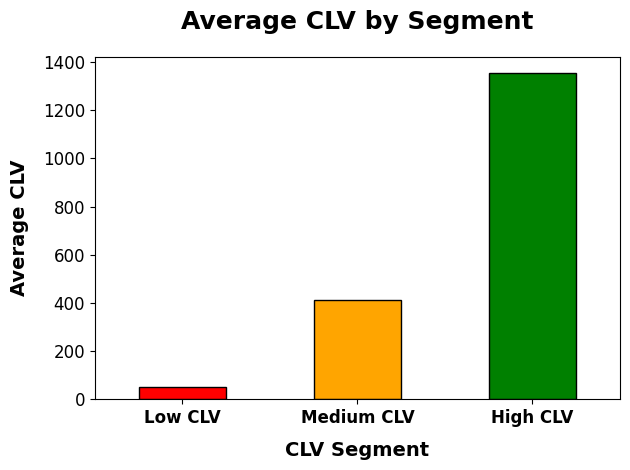


**Recommendations:**
1. Focus re-engagement campaigns (e.g., loyalty points, discounts) on churned customers with moderate spending.
2. Prioritize High CLV customers with premium offers to maintain loyalty.
3. Encourage Medium CLV customers to increase spending through personalized campaigns.


In [ ]:
## CLV Prediction

# Select features for CLV prediction
features_clv = [
    'Annual_Income', 'Children_At_Home', 'Teens_At_Home', 'Deals_Purchases',
    'Web_Purchases', 'Catalog_Purchases', 'Store_Purchases',
    'Web_Visits_Month', 'Days_Since_Last_Purchase'
]  # These features are assumed to impact Total Spending (CLV)
X_clv = df[features_clv]  # Features
y_clv = df['Total_Spending']  # Target variable: Total Spending (proxy for CLV)

# Standardize features to improve model performance
scaler = StandardScaler()
X_clv_scaled = scaler.fit_transform(X_clv)

# Split data into training and testing sets
X_train_clv, X_test_clv, y_train_clv, y_test_clv = train_test_split(
    X_clv_scaled, y_clv, test_size=0.2, random_state=42
)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_clv, y_train_clv)

# Predict CLV on the test set
y_pred_clv = lr_model.predict(X_test_clv)

# Evaluate the Linear Regression model
mse = mean_squared_error(y_test_clv, y_pred_clv)  # Mean Squared Error
r2 = r2_score(y_test_clv, y_pred_clv)  # R-Squared (explained variance)

print("\nCLV Prediction Model Performance:")
print("Mean Squared Error (MSE):", mse)
print("R-Squared (R2):", r2)

# Visualize Actual vs. Predicted CLV
plt.figure(figsize=(10, 7))
plt.scatter(y_test_clv, y_pred_clv, alpha=0.6, color='green', edgecolor='black', s=70)
plt.plot(
    [y_test_clv.min(), y_test_clv.max()],
    [y_test_clv.min(), y_test_clv.max()],
    color='red', linestyle='--', linewidth=2, label='Perfect Prediction'
)  # Reference line

# Add titles and labels with better styling
plt.title('Actual vs Predicted CLV', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Actual CLV', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Predicted CLV', fontsize=14, fontweight='bold', labelpad=10)

# Customize ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12, loc='upper left', frameon=True, shadow=True)

# Improve layout
plt.tight_layout()
plt.grid(linestyle='--', alpha=0.5)  # Optional gridlines for readability
plt.show()


# Segment Customers Based on CLV
df['CLV_Segment'] = pd.qcut(df['Total_Spending'], q=3, labels=['Low CLV', 'Medium CLV', 'High CLV'])
# Divide customers into 3 equal groups based on Total Spending

# Visualize Average CLV by Segment
clv_segments = df.groupby('CLV_Segment')['Total_Spending'].mean()  # Mean spending per segment
clv_segments.plot(
    kind='bar',
    color=['red', 'orange', 'green'],
    edgecolor='black',
    linewidth=1
)

# Add title and axis labels with improved styling
plt.title('Average CLV by Segment', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('CLV Segment', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Average CLV', fontsize=14, fontweight='bold', labelpad=10)

# Customize x and y ticks
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()

# Recommendations based on CLV Segmentation
print("\n**Recommendations:**")
print("1. Focus re-engagement campaigns (e.g., loyalty points, discounts) on churned customers with moderate spending.")
print("2. Prioritize High CLV customers with premium offers to maintain loyalty.")
print("3. Encourage Medium CLV customers to increase spending through personalized campaigns.")


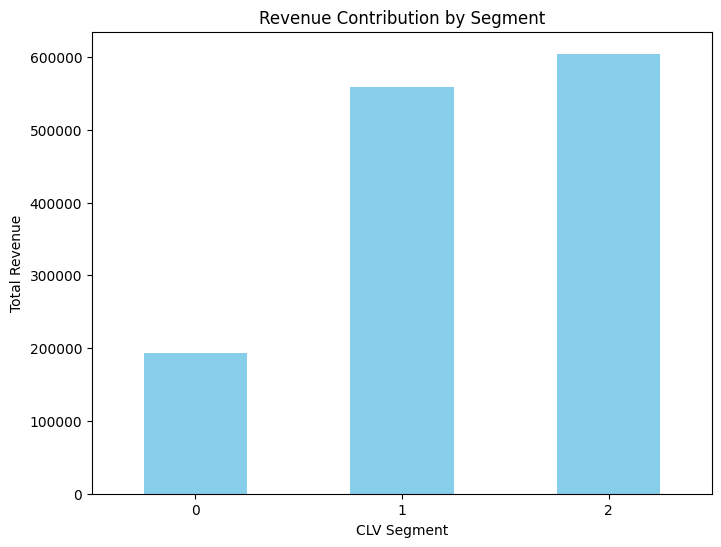

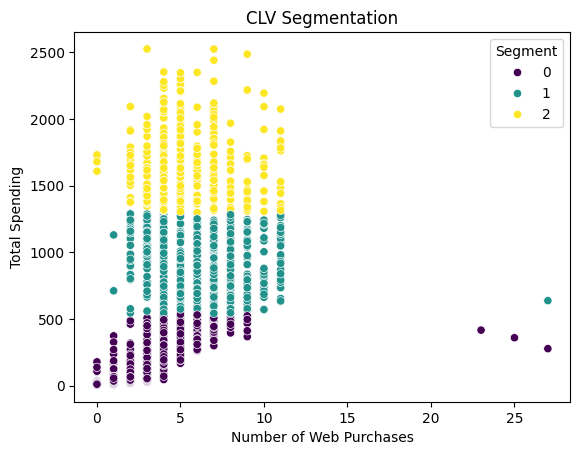

In [ ]:
# Define clustering features
clustering_features = ['Total_Spending', 'Web_Purchases', 'Store_Purchases']  # Updated column names

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['CLV_Segment'] = kmeans.fit_predict(df[clustering_features])

# Analyze revenue contribution by segment
revenue_by_segment = df.groupby('CLV_Segment')['Total_Spending'].sum()

# Visualize revenue by segment
plt.figure(figsize=(8, 6))
revenue_by_segment.plot(kind='bar', color='skyblue', title='Revenue Contribution by Segment')
plt.xlabel('CLV Segment')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

# Visualize clustering
sns.scatterplot(data=df, x='Web_Purchases', y='Total_Spending', hue='CLV_Segment', palette='viridis')
plt.title('CLV Segmentation')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Total Spending')
plt.legend(title='Segment')
plt.show()


ROI and Conversion Rates Analysis

Campaign A (Discount): Average ROI = $773.03
Campaign B (Loyalty Points): Average ROI = $1066.29


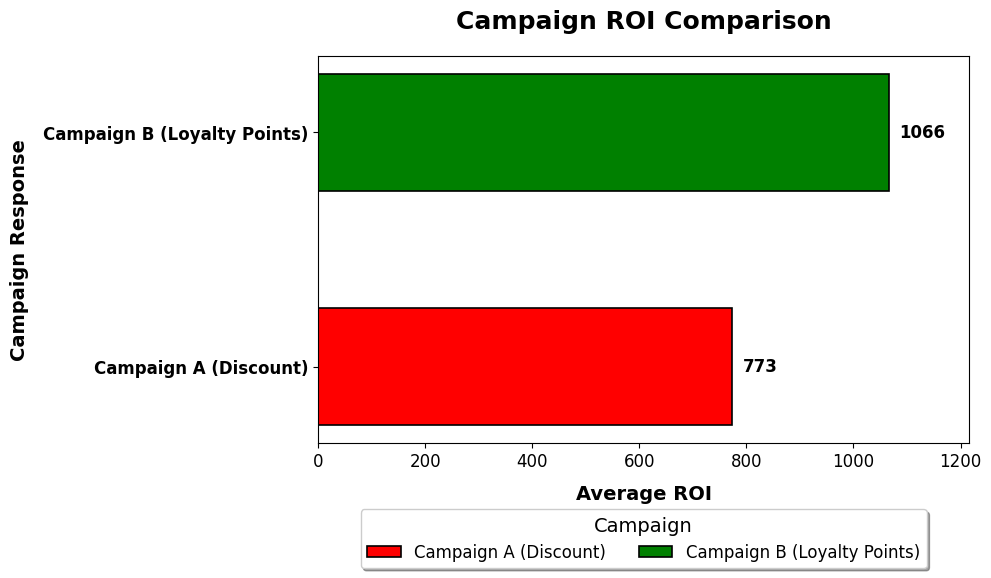


**Recommendations**:
1. Focus on customers with higher income and education levels for better response rates.
2. Campaign B (Loyalty Points) shows a higher ROI and should be prioritized.


In [ ]:

# ---------------------------
# Simulate A/B Testing for Discounts vs. Loyalty Points
# ---------------------------

# Campaign A: 20% Discount applied to 50% of positive responders
campaign_a = df[df['Campaign_Response'] == 1]['Total_Spending'].sample(frac=0.5, random_state=42) * 0.8

# Campaign B: $100 Loyalty Points added to 50% of positive responders
campaign_b = df[df['Campaign_Response'] == 1]['Total_Spending'].sample(frac=0.5, random_state=42) + 100

# Calculate Mean ROI for each campaign
campaign_a_roi = campaign_a.mean()
campaign_b_roi = campaign_b.mean()

# ---------------------------
# Print ROI Results for Both Campaigns
# ---------------------------
print(f"Campaign A (Discount): Average ROI = ${campaign_a_roi:.2f}")
print(f"Campaign B (Loyalty Points): Average ROI = ${campaign_b_roi:.2f}")

# Create a DataFrame for ROI values
roi_data_normal = pd.Series(
    [campaign_a_roi, campaign_b_roi],
    index=["Campaign A (Discount)", "Campaign B (Loyalty Points)"]
)


# Horizontal Bar Chart with Enhanced Styling
plt.figure(figsize=(10, 6))
bars = plt.barh(
    roi_data_normal.index,
    roi_data_normal,
    color=['red', 'green'],  # Updated colors for Campaign A and B
    edgecolor='black',
    linewidth=1.2,
    height=0.5  # Reduce bar height for better aesthetics
)

# Add title and axis labels with improved styling
plt.title('Campaign ROI Comparison', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Average ROI', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Campaign Response', fontsize=14, fontweight='bold', labelpad=10)

# Customize x and y ticks
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12, fontweight='bold')

# Extend x-axis to create space for annotations
plt.xlim(0, roi_data_normal.max() + 150)  # Extend the limit slightly beyond the largest value

# Move legend to the bottom center
plt.legend(
    bars,
    ['Campaign A (Discount)', 'Campaign B (Loyalty Points)'],
    title='Campaign',
    fontsize=12,
    title_fontsize=14,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),  # Position legend below the chart
    frameon=True,
    shadow=True,
    ncol=2  # Arrange legend in two columns
)

# Add value annotations on bars
for i, val in enumerate(roi_data_normal):
    plt.text(
        x=val + 20,  # Position annotation slightly to the right of the bar
        y=i,  # Align with bar position
        s=f'{val:.0f}',
        va='center',  # Vertically align annotation with the bar
        ha='left',  # Align text to the left of the number
        fontsize=12,
        fontweight='bold'
    )

# Adjust layout for better fit
plt.tight_layout()
plt.show()


# ---------------------------
# Recommendations Based on ROI Analysis
# ---------------------------
print("\n**Recommendations**:")
print("1. Focus on customers with higher income and education levels for better response rates.")
print("2. Campaign B (Loyalty Points) shows a higher ROI and should be prioritized.")
